# Importing Libraries and Setting Up Environment

In [489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

# Loading the Titanic Dataset

In [494]:
df = pd.read_csv("Titanic-Dataset.csv")

In [498]:
#Previewing the First 4 Rows of the Dataset
df[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


# Explore basic info

In [501]:
# shape of the data
df.shape

(891, 12)

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [505]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [507]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handle missing values using imputation

In [510]:
# Initialize imputer with strategy: 'mean'
imputer = SimpleImputer(strategy='mean')
# Apply imputation to Age column
df['Age'] = imputer.fit_transform(df[['Age']])

In [512]:
# Fill missing values of Embarked column with the mode 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [514]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [516]:
df = df.drop("Name",axis=1)
df = df.drop("Ticket",axis=1)
df = df.drop("Cabin",axis=1)

In [518]:
df[:4]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S


# Convert categorical features into numerical using Label-Encoder

In [521]:
# Label Encoding (converting 'male' to 0, 'female' to 1)
df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1})

In [523]:
df[:2]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,1


In [525]:
# Label Encoding (converting 'S' to 0, 'C' to 1, 'Q' to 2)
df['Embarked_encoded'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [527]:
df[:5]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_encoded
0,1,0,3,male,22.0,1,0,7.2500,S,0,0
1,2,1,1,female,38.0,1,0,71.2833,C,1,1
2,3,1,3,female,26.0,0,0,7.9250,S,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0


In [529]:
# Drop the 'Sex' and 'Embarked' columns
df = df.drop(columns=['Sex', 'Embarked'])

In [531]:
df[:5]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded
0,1,0,3,22.0,1,0,7.2500,0,0
1,2,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,26.0,0,0,7.9250,1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,0,0


# Normalize/standardize the numerical features

In [534]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])


# Visualize outliers using boxplots

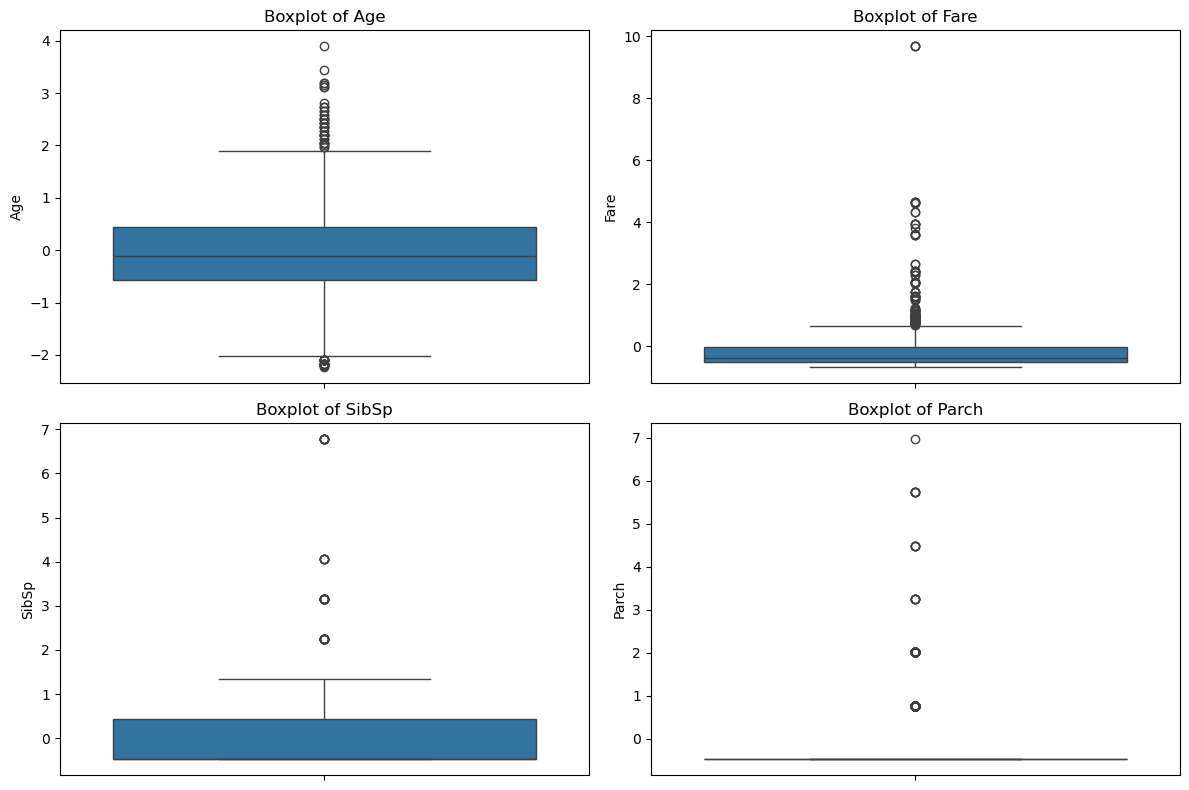

In [537]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.flatten(), numerical_cols):
    sns.boxplot(data=df_cleaned, y=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


# Removing Outliers

In [540]:
# Define numerical columns to check for outliers
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the function
df_cleaned_no_outliers = remove_outliers_iqr(df_cleaned, numerical_cols)


# Check Shape and Basic Stats Again

In [543]:
print("Shape after removing outliers:", df_cleaned.shape)
print(df_cleaned.describe())


Shape after removing outliers: (891, 11)
       PassengerId    Survived      Pclass         Age         SibSp  \
count   891.000000  891.000000  891.000000  891.000000  8.910000e+02   
mean    446.000000    0.383838    2.308642    0.000000  1.594933e-17   
std     257.353842    0.486592    0.836071    1.000562  1.000562e+00   
min       1.000000    0.000000    1.000000   -2.224156 -4.745452e-01   
25%     223.500000    0.000000    2.000000   -0.565736 -4.745452e-01   
50%     446.000000    0.000000    3.000000   -0.104637 -4.745452e-01   
75%     668.500000    1.000000    3.000000    0.433312  4.327934e-01   
max     891.000000    1.000000    3.000000    3.891554  6.784163e+00   

              Parch          Fare  
count  8.910000e+02  8.910000e+02  
mean  -5.283216e-17  3.987333e-18  
std    1.000562e+00  1.000562e+00  
min   -4.736736e-01 -6.484217e-01  
25%   -4.736736e-01 -4.891482e-01  
50%   -4.736736e-01 -3.573909e-01  
75%   -4.736736e-01 -2.424635e-02  
max    6.974147e+00  9

# Visualize Distributions Again

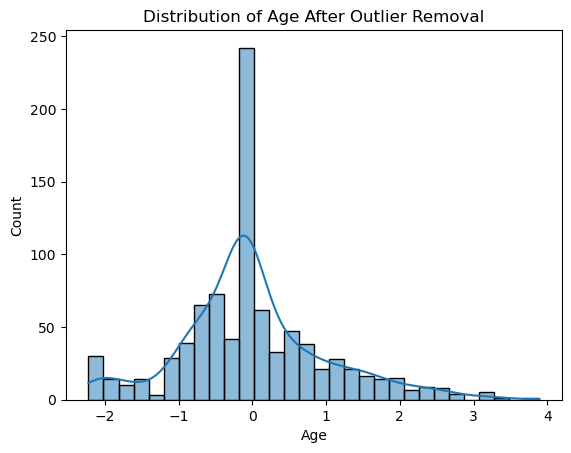

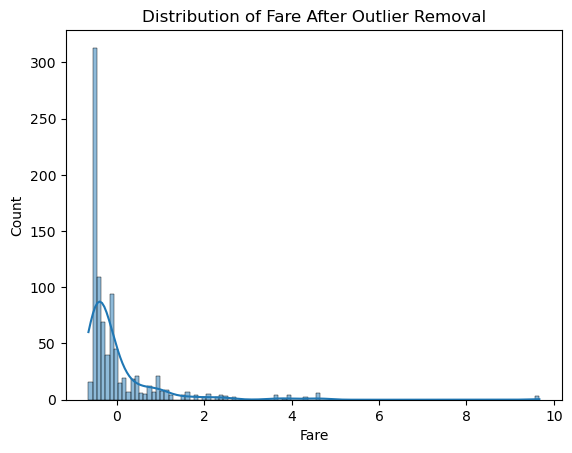

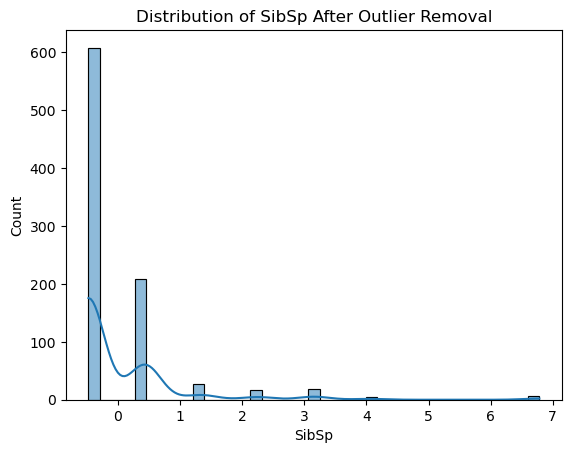

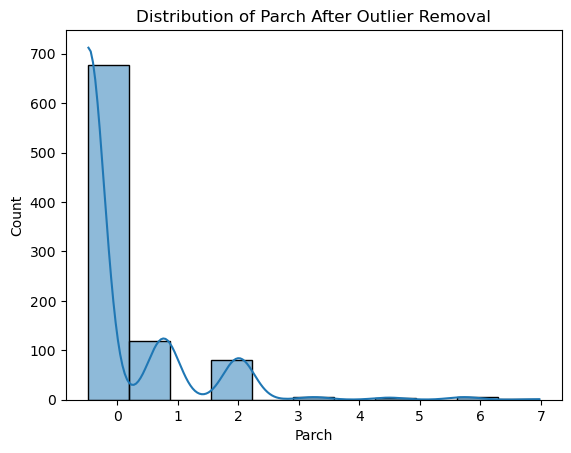

In [546]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col} After Outlier Removal')
    plt.show()


# Prepare for Machine Learning / Analysis

In [549]:
X= df.drop(["Survived"],axis=1)

In [551]:
X.isnull().sum()

PassengerId         0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
Sex_encoded         0
Embarked_encoded    0
dtype: int64

In [553]:
y = df["Survived"]

In [555]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Train model using Logistic Regression Algo

In [558]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7988826815642458


---

# Train model using Decision Tree Classifier

In [562]:
# decision tree classifier
from sklearn import tree

In [564]:
m = tree.DecisionTreeClassifier()

In [566]:
m.fit(x_new,y)

DecisionTreeClassifier()

In [568]:
#accuracy
m.score(x_new,y)

0.9988776655443322

Accuracy by using Decision_Tree_Classifier : 99%